### Калибровка светотермометра и термопары
Коэффициент термопары - 41 мкВ/$^{\circ}C$  
Напряжение = 38.175 В  
Рассчетная температура = 931.09 $^{\circ}$  
Установленная температура = 930 $^{\circ}$  
Погрешность = 0.2%

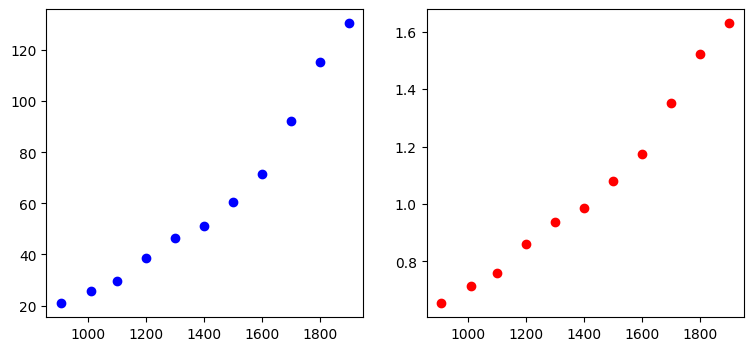

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Лампа накаливания
df = pd.DataFrame()
df['T, C'] = [905, 1010, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
df['U, V'] = [20.89, 25.89, 29.75, 38.75, 46.30, 51.30, 60.57, 71.40, 92.39, 115.30, 130.50]
df['I, mA'] = [0.654, 0.714, 0.760, 0.859, 0.936, 0.987, 1.081, 1.174, 1.353, 1.523, 1.630]


fig, axs = plt.subplots(1, 2, figsize = (9, 4))
axs[0].plot(df['T, C'], df['U, V'], 'bo')
axs[1].plot(df['T, C'], df['I, mA'], 'ro')


2 пункт, измертье яркостную температуру поверхности трубки и каждого из колец. Объясните различие яркостных температур каждого из колец при одинаковой термодинамической температуре.
Измерить яркостную температуру колец не получилось, т.к. не достаточная температура для пирометра. Оценим различие яркостной температуры на глаз.

### Проверка закона Стефана-Больцмана.
Пользуясь графиком $T = f_1(T_{ярк})$ вычислим для каждого значения термодинамической температуры мощность, потребляемую нитью лампы. Результат представляем в виде графика $W = f_2(T)$.

Для проверки закона Стефана-Больцмана построим в логарифмическом масштабе график зависимости 
$$W = \epsilon_T * B * T^n$$
$$\ln(W) = \ln(\epsilon_T * B) + n\ln(T)$$
Откуда определим n (как тангенс угла наклона в области высоких температур). Величина должна быть близка к 4.  

a: 3.7017538605467877 error_rate a: 0.16618025964908673 
b: -29.647017458607205 error_rate b: 1.2002562023466146


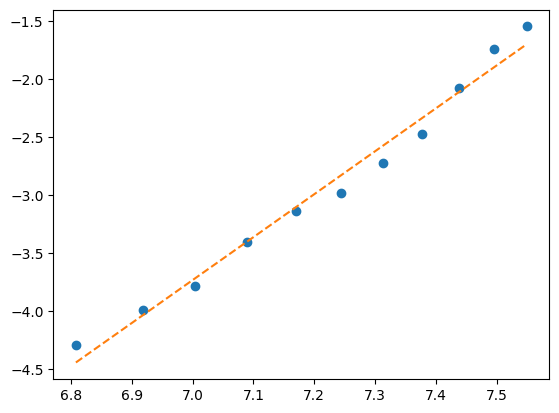

In [24]:
import scipy.optimize
import numpy as np

df['ln(T)'] = np.log(df['T, C'])
df['N'] = df['I, mA'] * df['U, V'] / 1000
df['ln(N)'] = np.log(df['N'])

x = df['ln(T)']
y = df['ln(N)']

def mapping(x, a, b):
    return a * x + b

args, covarian = scipy.optimize.curve_fit(mapping, x, y)
a, b = args[0], args[1]

x_teor = np.linspace(min(x), max(x), 1024)
y_teor = a * x_teor + b

perr = np.sqrt(np.diag(covarian))
print("a:", a, "error_rate a:", perr[0], "\nb:", b, "error_rate b:", perr[1])

plt.plot(x, y, 'o')
plt.plot(x_teor, y_teor, '--')

Как видно из рассчетов выше:  
n = 3.7  
Теперь определим величину постоянной Стефана-Больцмана по формуле: $$\omega = \frac{W}{\epsilon_T * S * T^4}$$
$\epsilon_T$ - ослабление излучения тела, относительно АЧТ возьмем из табличных данных.  
S = 0.36 $см^2$ - эффективная влощадь излучающей поверхности нити лампа при температуре более 1500 $^\circ C$  

In [46]:
df['T, C'] = [905, 1010, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
df['eps_T'] = [0.081, 0.106, 0.119, 0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.223, 0.236]
df['h'] = np.power(np.divide((2 * np.pi ** 5 / (1.38 ** 23)), (15 * (3 * 10 ** 8) ** 2 * df['sigma'])), 1 / 3)
# df['eps_T'] = [0.458, 0.456, 0.454, 0.452, 0.450, 0.448, 0.446, 0.443, 0.441, 0.439, 0.437]
S = 0.36 * 0.0001

# sigma = (I * V) / (e * S * T ** 4)
df['sigma'] = df['N'] / (df['eps_T'] * S * (df['T, C'] ** 4))
print("Sigma =", np.average(df['sigma'][6:]))
print("h =", np.average(df['h'][:6]))

Sigma = 1.964628559782416e-09
h = 0.0004233731769990789


Получили постоянную:
$\sigma = 19.6 * 10^{-8} \frac{Вт}{м^2 * ^\circ C}$